
## Supervised classification - improving capacity learning
<hr>

## 0. Import library
<hr>
Import library

In [5]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

import math


## 1. Load and plot the dataset (dataset-noise-01.txt)
<hr>
The data features for each data $i$ are $x_i=(x_{i(1)},x_{i(2)})$.

The data label/target, $y_i$, indicates two classes with value 0 or 1.

Plot the data points.

You may use matplotlib function `scatter(x,y)`.

Number of the data = 1000
Shape of the data = (1000, 3)
Data type of the data = float64


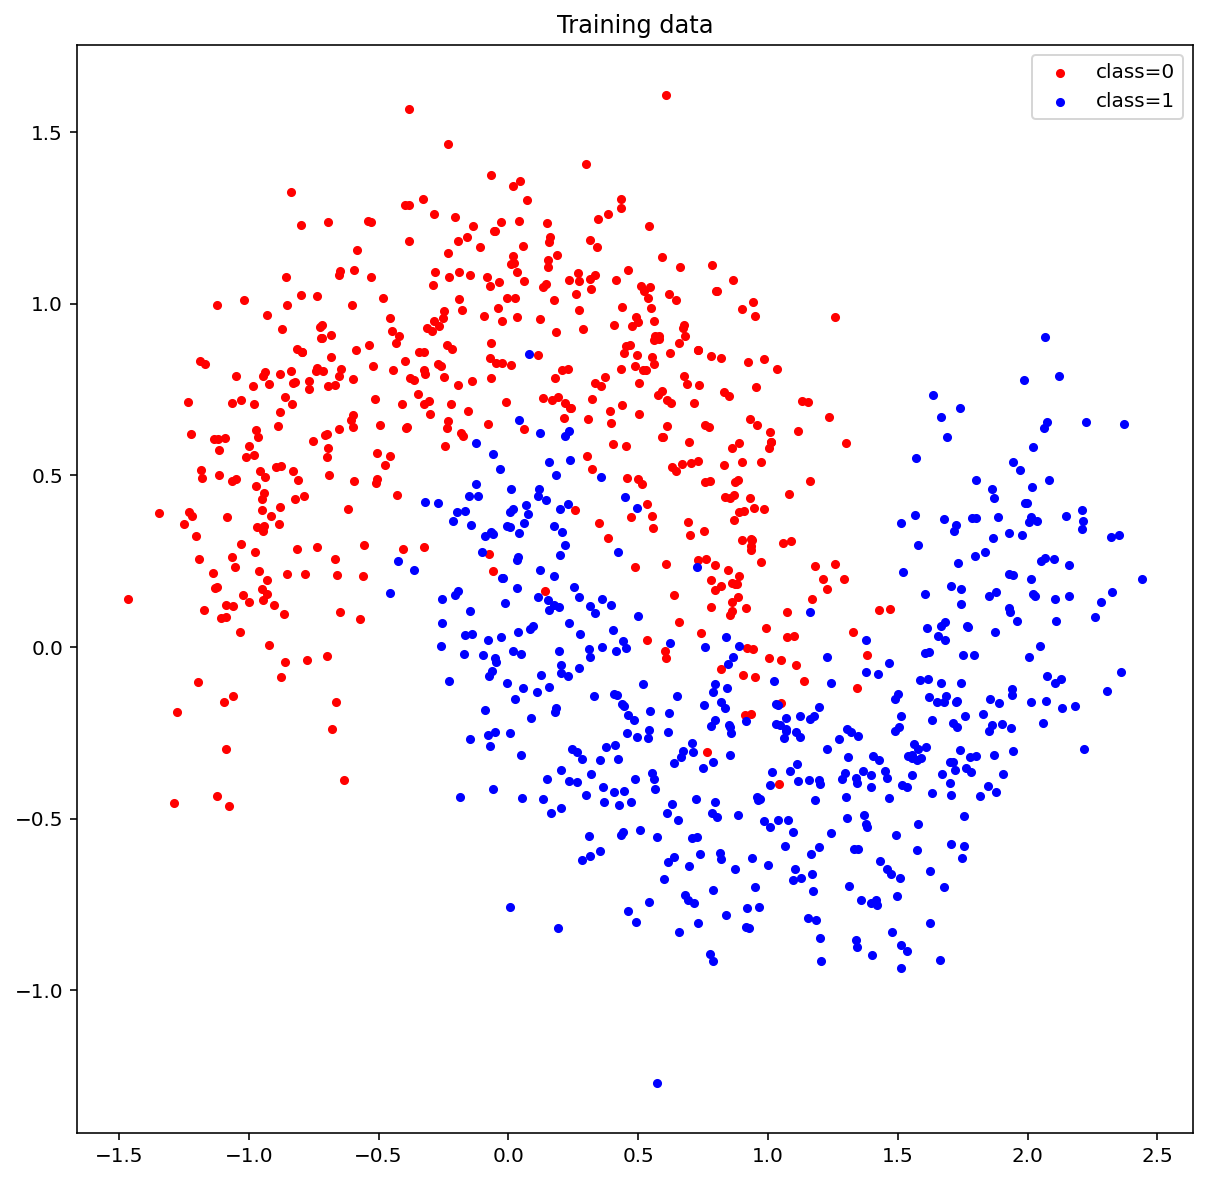

In [253]:
# import data with numpy
data = np.loadtxt('dataset-noise-01.txt', delimiter=',')

# number of training data
n = data.shape[0] 
print('Number of the data = {}'.format(n))
print('Shape of the data = {}'.format(data.shape))
print('Data type of the data = {}'.format(data.dtype))

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx = data[:,2] # label

idx_class0 = (idx==0)# index of class0
idx_class1 = (idx==1) # index of class1

plt.figure(1,figsize=(10,10))
plt.scatter(x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()


## 2. Define a logistic regression loss function and its gradient
<hr>

In [38]:
# sigmoid function
def sigmoid(z):
    sigmoid_f = 1 / (1+np.exp(-z))
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(X.dot(w))
    return p


# loss function definition
def loss_logreg(y_pred,y): 
    n = len(y)
    loss = (-y.T.dot(np.log(y_pred)) - (1-y.T).dot(np.log(1-y_pred))) / n
    return loss


# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad = (X.T.dot(y_pred-y) * 2) / n
    return grad


# gradient descent function definition
def grad_desc(X, y , w_init, tau, max_iter):

    L_iters = np.zeros([max_iter]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X, w) # linear predicition function   
        grad_f = grad_loss(y_pred, y, X) # gradient of the loss  
        w = w - tau * grad_f # update rule of gradient descent  
        L_iters[i] = loss_logreg(y_pred, y) # save the current loss value 
        
    return w, L_iters

## 3. define a prediction function and run a gradient descent algorithm
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

The prediction function can be defined in terms of the following feature functions $f_i$ as follows:

$$
X = 
\left[ 
\begin{array}{cccccc}
f_0(x_1) & f_1(x_1) & f_2(x_1) & f_3(x_1) & f_4(x_1) & f_5(x_1) & f_6(x_1) & f_7(x_1) & f_8(x_1) & f_9(x_1) \\
f_0(x_2) & f_1(x_2) & f_2(x_2) & f_3(x_2) & f_4(x_2) & f_5(x_2) & f_6(x_2) & f_7(x_2) & f_8(x_2) & f_9(x_2) \\
\vdots\\
f_0(x_n) & f_1(x_n) & f_2(x_n) & f_3(x_n) & f_4(x_n) & f_5(x_n) & f_6(x_n) & f_7(x_n) & f_8(x_n) & f_9(x_n) \\
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2 \\ 
w_3 \\ 
w_4 \\ 
w_5 \\
w_6 \\ 
w_7 \\ 
w_8 \\ 
w_9
\end{array} 
\right]
\quad
$$

where $x_i = (x_i(1), x_i(2))$ and you can define a feature function $f_i$ as you want.

You can use at most 10 feature functions $f_i$, $i = 0, 1, 2, \cdots, 9$ in such a way that the classification accuracy is maximized. You are allowed to use less than 10 feature functions.

Implement the logistic regression function with gradient descent using a vectorization scheme.

In [209]:
L_iters.argmin()

29773

[[ 3.95122259]
 [-0.02225838]
 [ 1.06120844]
 [-0.07015669]
 [-9.49750157]]


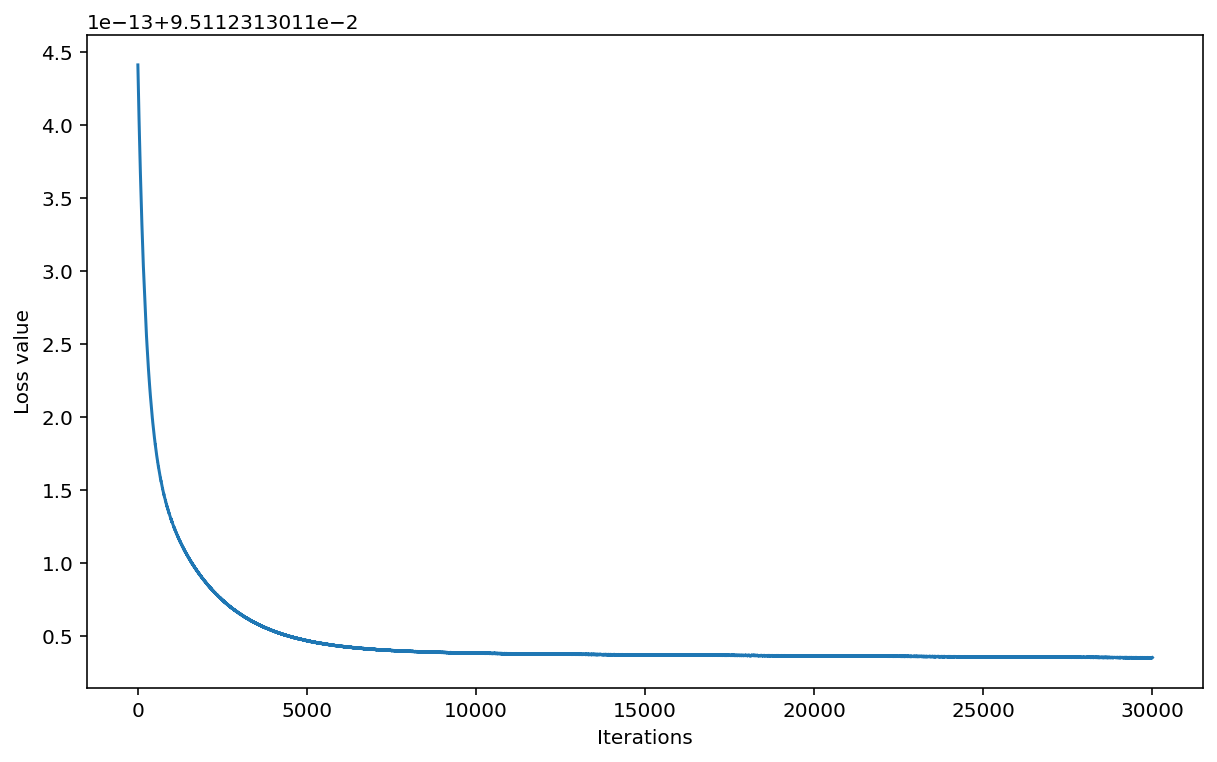

In [208]:
import math
# construct the data matrix X, and label vector y
n = data.shape[0]
X = np.ones([n,5])
X[:,0] = np.power(data[:,0],2)
X[:,1] = data[:,0]
X[:,2] = np.power(data[:,1],2)
X[:,3] = data[:,1]


y = data[:,2][:,None] # label 


# run gradient descent algorithm
start = time.time()
w_init = np.array([ 3.95122432, -0.02225842,  1.06120887, -0.07015676, -9.49750])[:,None]
tau = 2e-3; max_iter = 30000
w, L_iters = grad_desc(X, y, w_init, tau, max_iter)
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

In [82]:
np.unique(p)[500]

0.06077599445792555

## 4. Plot the decisoin boundary
<hr>

<ipython-input-85-e8876c3f443a>:23: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx1,xx2,p,[0.49,0.51], linewidths=2, colors='k')


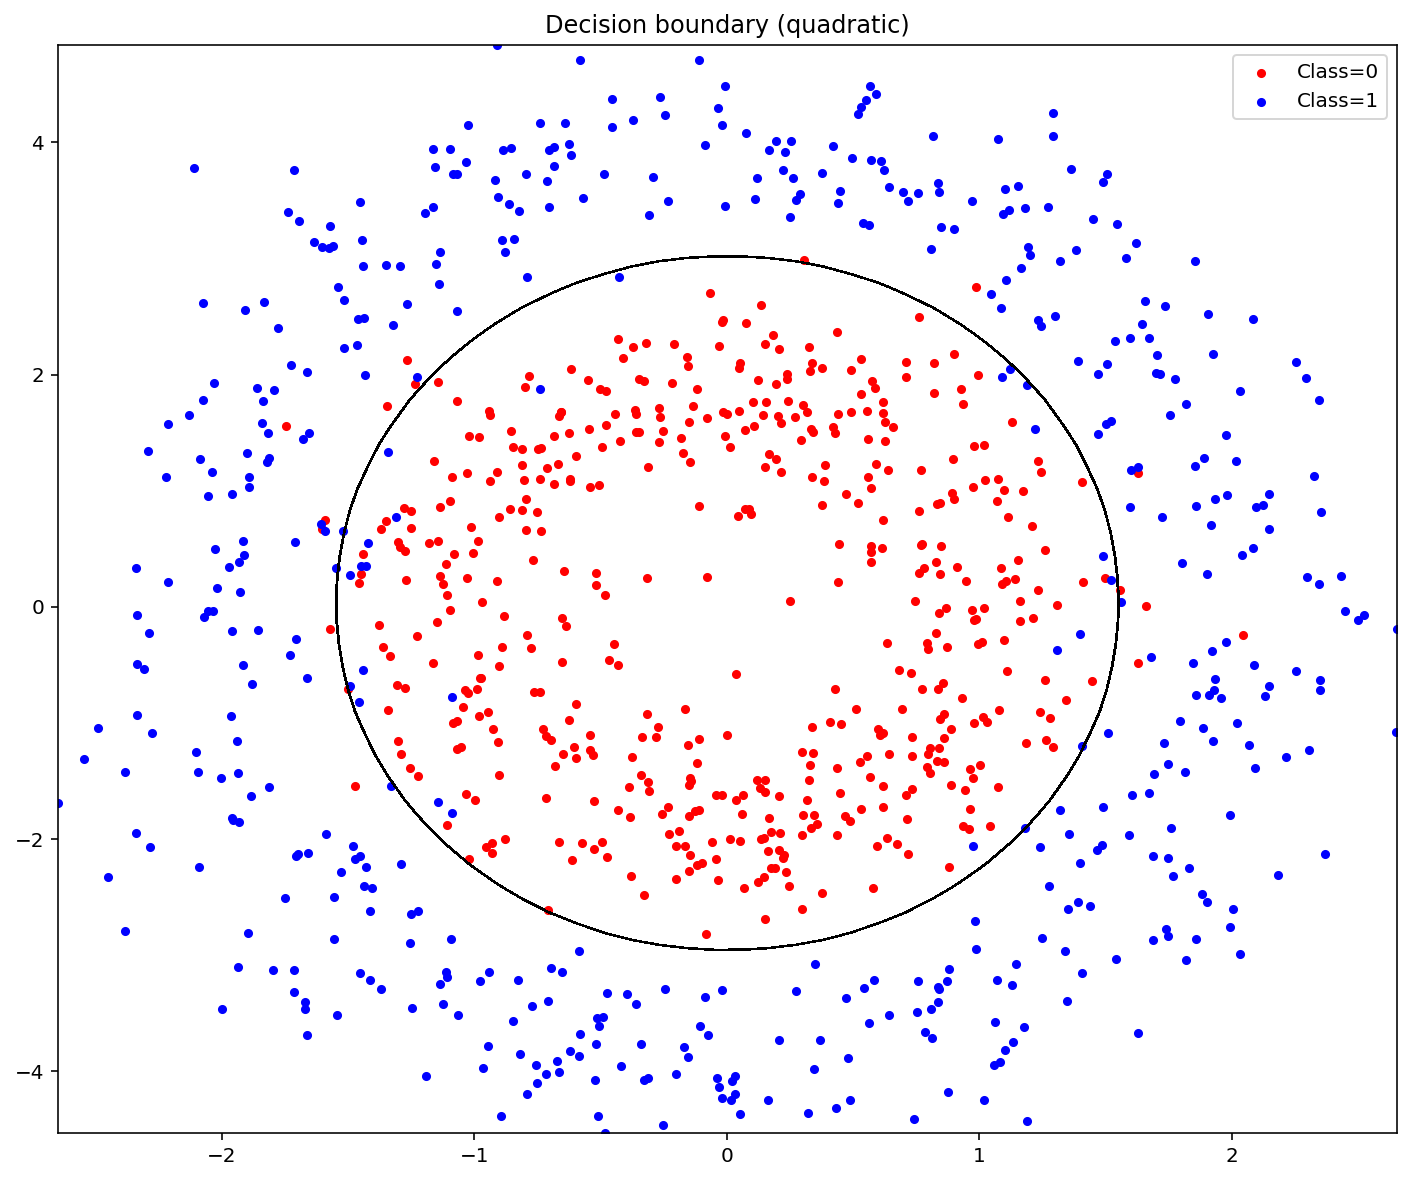

In [85]:
# compute values p(x) for multiple data points x
x1_min, x1_max = data[:,0].min(),data[:,0].max() # min and max of grade 1
x2_min, x2_max = data[:,1].min(),data[:,1].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 =np.ones([np.prod(xx1.shape),5]) 
X2[:,0] = np.power(xx1.reshape(-1),2)
X2[:,1] = xx1.reshape(-1)
X2[:,2] = np.power(xx2.reshape(-1),2)
X2[:,3] = xx2.reshape(-1)

p = f_pred(X2,w)
p = p.reshape(xx1.shape)

# plot
plt.figure(4,figsize=(12,10))

#ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
#cbar = plt.colorbar(ax)
#cbar.update_ticks()

plt.scatter(x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='Class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=50, c='b', marker='.', label='Class=1')
plt.contourf(xx1,xx2,p,[0.49,0.51], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (quadratic)')
plt.show()

## 5. Plot the probability map
<hr>

<ipython-input-97-d0c02dba8c7f>:24: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx1,xx2,p,[0.49,0.51], linewidths=2, colors='k')


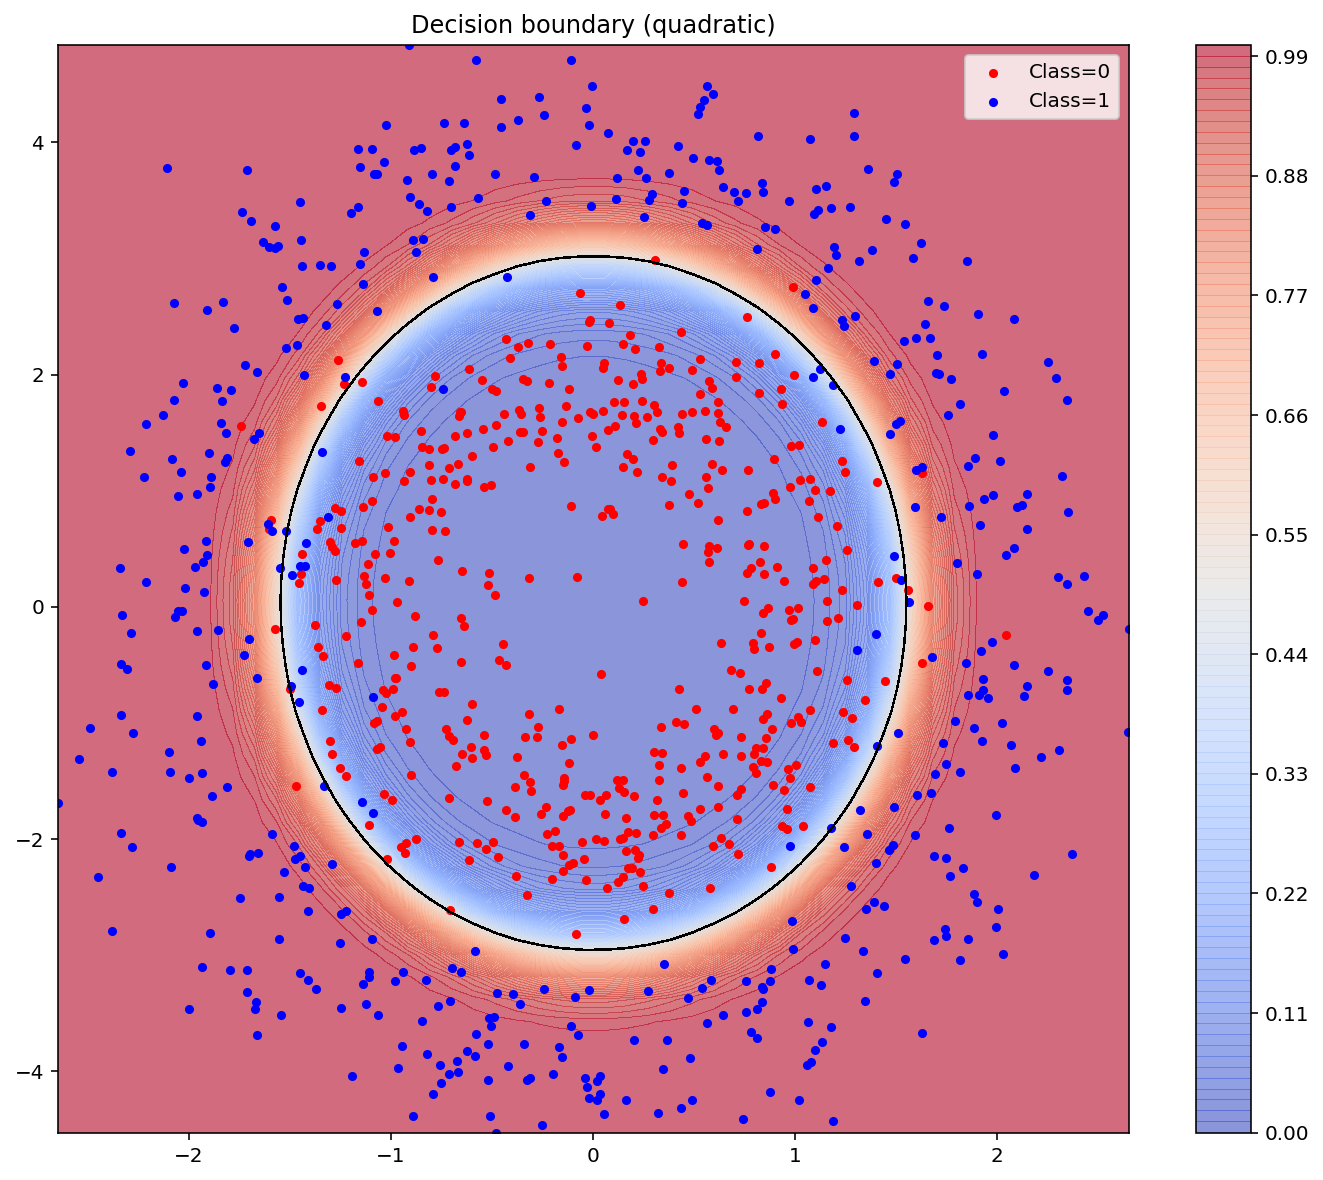

In [97]:
# compute values p(x) for multiple data points x
x1_min, x1_max = data[:,0].min(),data[:,0].max() # min and max of grade 1
x2_min, x2_max = data[:,1].min(),data[:,1].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 =np.ones([np.prod(xx1.shape),5]) 
X2[:,0] = np.power(xx1.reshape(-1),2)
X2[:,1] = xx1.reshape(-1)
X2[:,2] = np.power(xx2.reshape(-1),2)
X2[:,3] = xx2.reshape(-1)

p = f_pred(X2,w)
p = p.reshape(xx1.shape)

# plot
plt.figure(4,figsize=(12,10))


ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

plt.scatter(x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='Class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=50, c='b', marker='.', label='Class=1')
plt.contourf(xx1,xx2,p,[0.49,0.51], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (quadratic)')
plt.show()

## 6. Compute the classification accuracy
<hr>

### The accuracy is computed by:

$$
\textrm{accuracy} = \frac{\textrm{number of correctly classified data}}{\textrm{total number of data}}
$$

In [234]:
# compute the accuracy of the classifier
n = data.shape[0]

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx = data[:,2] # label

idx_class0 = (idx==0)# index of class0
idx_class1 = (idx==1) # index of class1

X2 =np.ones([n,5]) 
X2[:,0] = np.power(x1,2)
X2[:,1] = x1
X2[:,2] = np.power(x2,2)
X2[:,3] = x2

idx_class1_pred = np.where(f_pred(X2,w)>0.5,1,0).T

#print(idx_class1_label)
#print(idx_class1_pred)

idx_wrong = (idx!=idx_class1_pred)

#print(np.sum(idx_wrong))
print('total number of correctly classified data = ', (n-idx_wrong.sum()))
print('accuracy(%) = ', (n-idx_wrong.sum())/n)

total number of correctly classified data =  959
accuracy(%) =  0.959


## Output using the dataset (dataset-noise-01.txt)
<hr>

## 1. Visualize the data [1pt]
<ht>

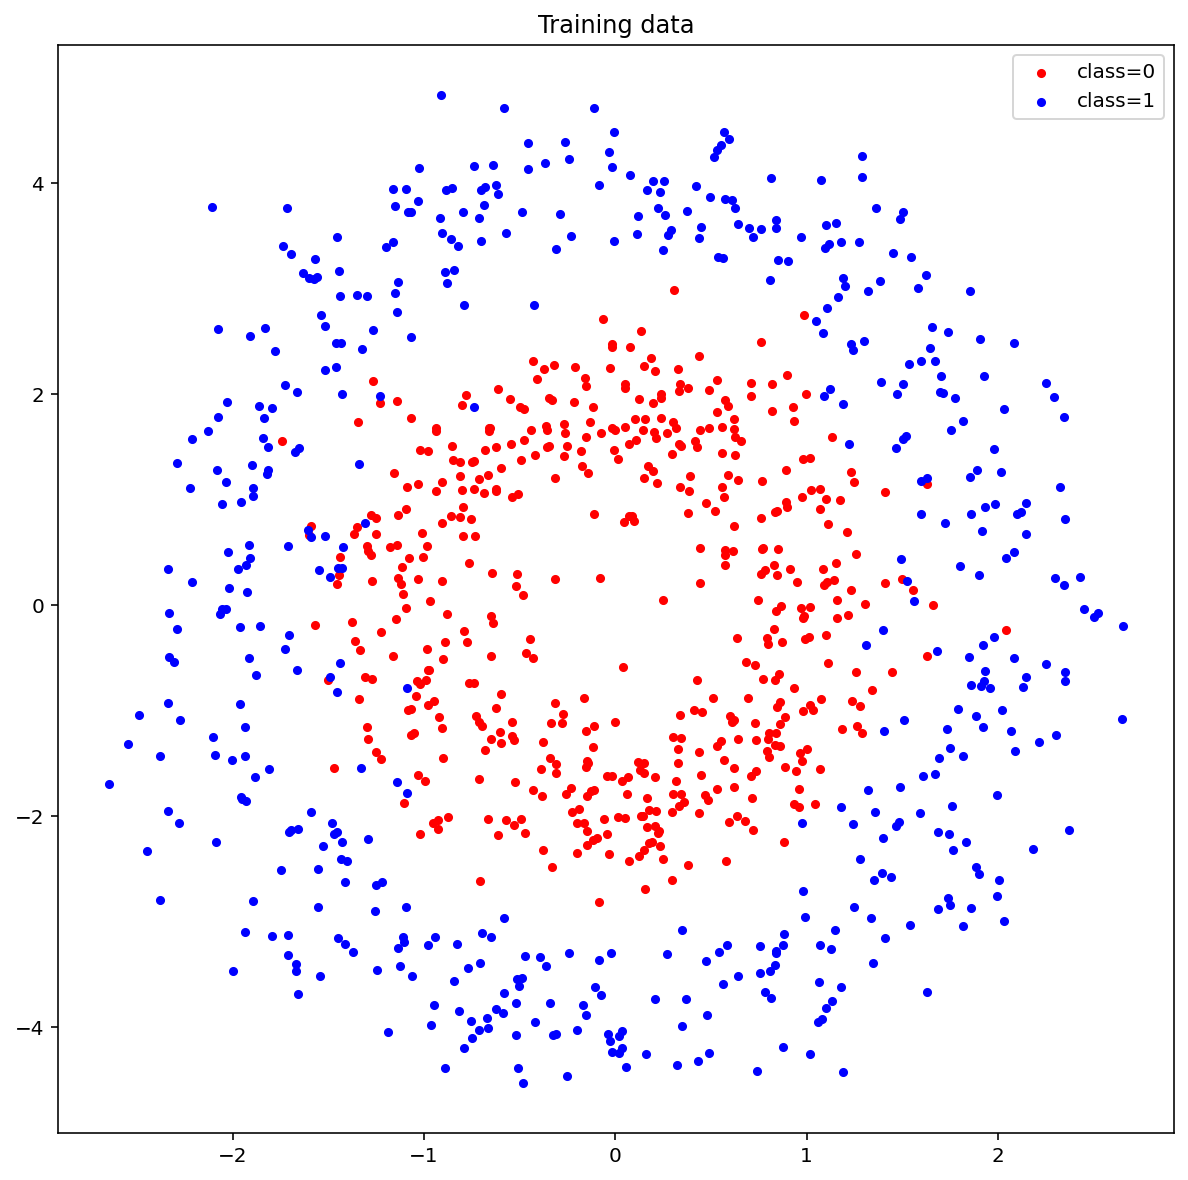

In [240]:
data = np.loadtxt('dataset-noise-01.txt', delimiter=',')
# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx = data[:,2] # label

idx_class0 = (idx==0)# index of class0
idx_class1 = (idx==1) # index of class1

plt.figure(1,figsize=(10,10))
plt.scatter(x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Plot the loss curve obtained by the gradient descent until the convergence [2pt]
<hr>

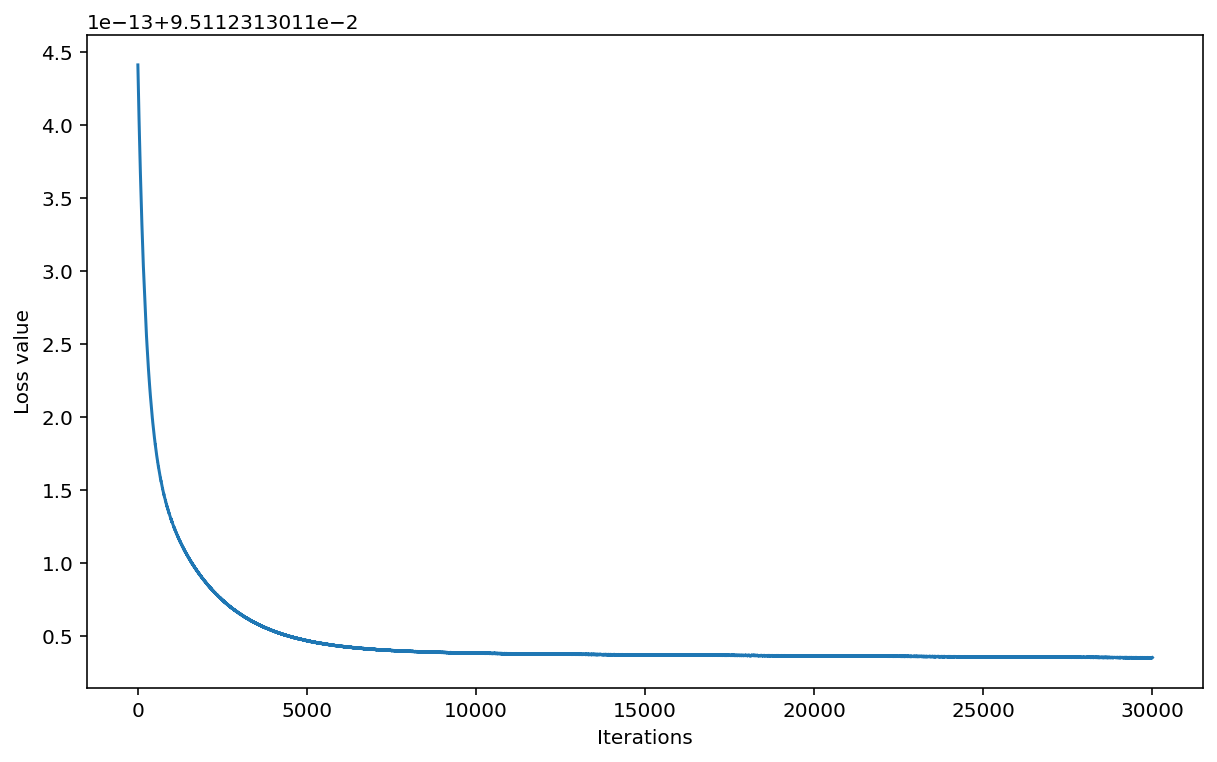

In [243]:
n = data.shape[0]
X = np.ones([n,5])
X[:,0] = np.power(data[:,0],2)
X[:,1] = data[:,0]
X[:,2] = np.power(data[:,1],2)
X[:,3] = data[:,1]

y = data[:,2][:,None] # label 

# run gradient descent algorithm
w_init = np.array([ 3.95122432, -0.02225842,  1.06120887, -0.07015676, -9.49750])[:,None]
tau = 2e-3; max_iter = 30000
w, L_iters = grad_desc(X, y, w_init, tau, max_iter)
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 3. Plot the decisoin boundary of the obtained classifier [2pt]
<hr>

<ipython-input-244-e8876c3f443a>:23: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx1,xx2,p,[0.49,0.51], linewidths=2, colors='k')


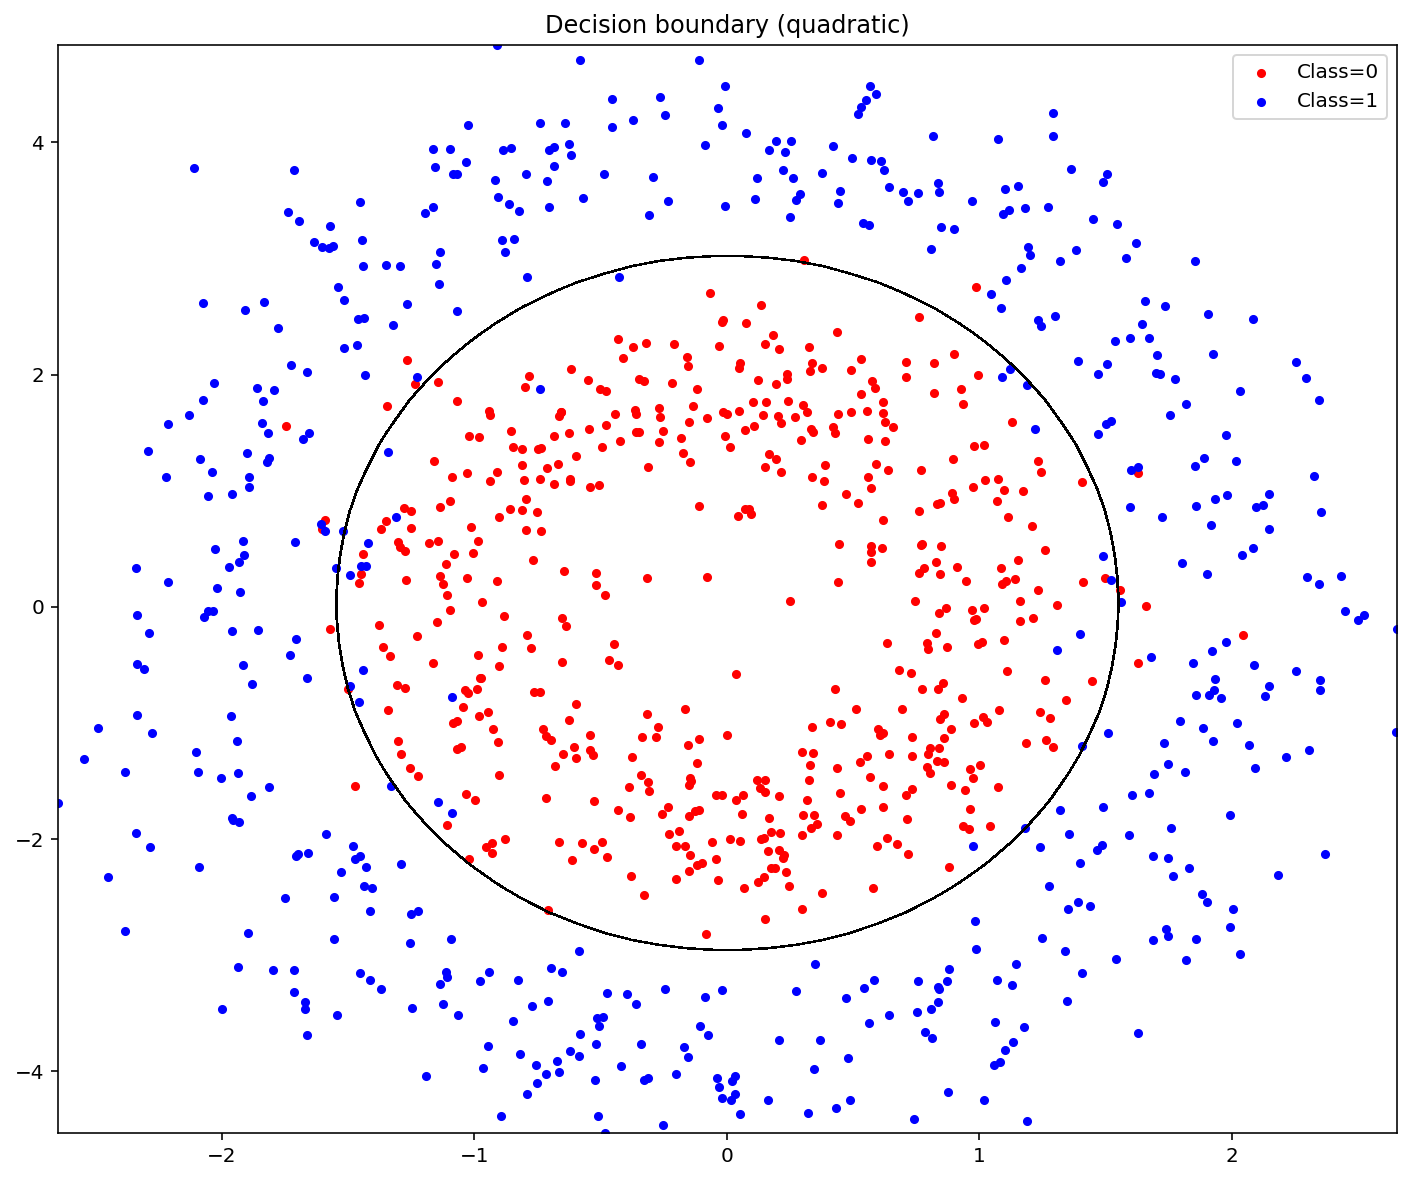

In [244]:
# compute values p(x) for multiple data points x
x1_min, x1_max = data[:,0].min(),data[:,0].max() # min and max of grade 1
x2_min, x2_max = data[:,1].min(),data[:,1].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 =np.ones([np.prod(xx1.shape),5]) 
X2[:,0] = np.power(xx1.reshape(-1),2)
X2[:,1] = xx1.reshape(-1)
X2[:,2] = np.power(xx2.reshape(-1),2)
X2[:,3] = xx2.reshape(-1)

p = f_pred(X2,w)
p = p.reshape(xx1.shape)

# plot
plt.figure(4,figsize=(12,10))

#ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
#cbar = plt.colorbar(ax)
#cbar.update_ticks()

plt.scatter(x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='Class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=50, c='b', marker='.', label='Class=1')
plt.contourf(xx1,xx2,p,[0.49,0.51], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (quadratic)')
plt.show()

## 4. Plot the probability map of the obtained classifier [2pt]
<hr>

<ipython-input-245-d0c02dba8c7f>:24: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx1,xx2,p,[0.49,0.51], linewidths=2, colors='k')


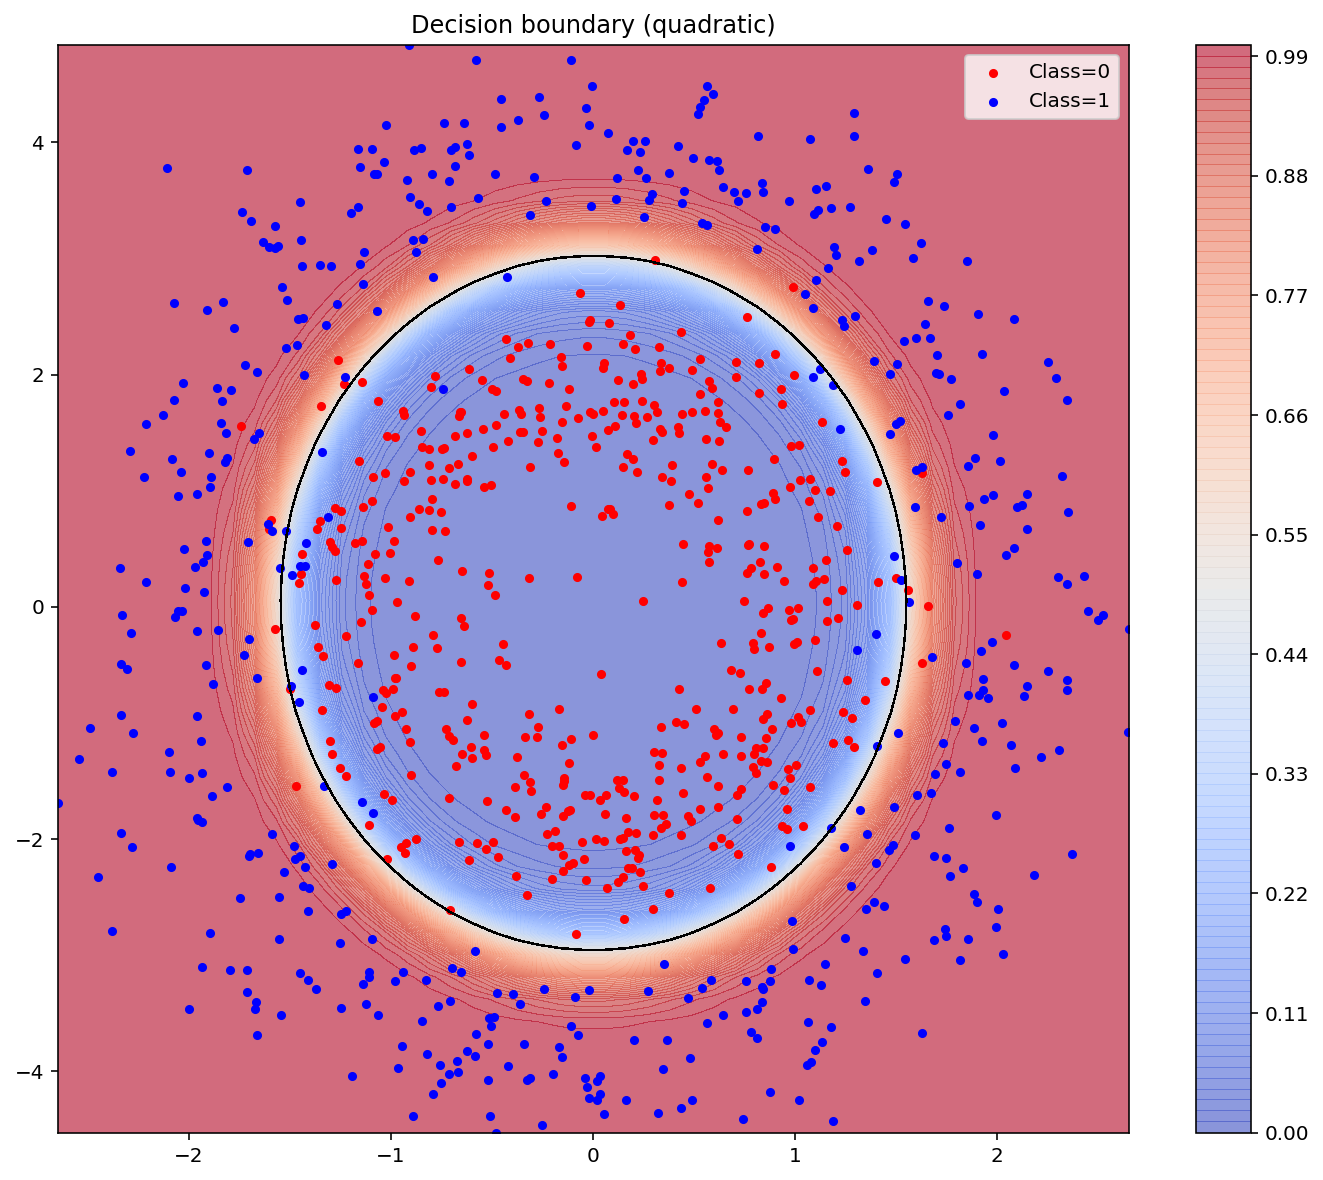

In [245]:
# compute values p(x) for multiple data points x
x1_min, x1_max = data[:,0].min(),data[:,0].max() # min and max of grade 1
x2_min, x2_max = data[:,1].min(),data[:,1].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 =np.ones([np.prod(xx1.shape),5]) 
X2[:,0] = np.power(xx1.reshape(-1),2)
X2[:,1] = xx1.reshape(-1)
X2[:,2] = np.power(xx2.reshape(-1),2)
X2[:,3] = xx2.reshape(-1)

p = f_pred(X2,w)
p = p.reshape(xx1.shape)

# plot
plt.figure(4,figsize=(12,10))


ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

plt.scatter(x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='Class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=50, c='b', marker='.', label='Class=1')
plt.contourf(xx1,xx2,p,[0.49,0.51], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (quadratic)')
plt.show()

## 5. Compute the classification accuracy [1pt]
<hr>

In [249]:
# compute the accuracy of the classifier
n = data.shape[0]

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx = data[:,2] # label

idx_class0 = (idx==0)# index of class0
idx_class1 = (idx==1) # index of class1

X2 =np.ones([n,5]) 
X2[:,0] = np.power(x1,2)
X2[:,1] = x1
X2[:,2] = np.power(x2,2)
X2[:,3] = x2

idx_class1_pred = np.where(f_pred(X2,w)>0.5,1,0).T

#print(idx_class1_label)
#print(idx_class1_pred)

idx_wrong = (idx!=idx_class1_pred)

#print(np.sum(idx_wrong))
print('total number = ', n)
print('total number of correctly classified data = ', (n-idx_wrong.sum()))
print('accuracy(%) = ', (n-idx_wrong.sum())/n)

total number =  1000
total number of correctly classified data =  959
accuracy(%) =  0.959
